# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

90:	learn: 14582.5496585	total: 46.1s	remaining: 4.56s
91:	learn: 14534.9409763	total: 46.6s	remaining: 4.05s
92:	learn: 14489.5581505	total: 47.1s	remaining: 3.55s
93:	learn: 14444.2577688	total: 47.6s	remaining: 3.04s
94:	learn: 14400.3845523	total: 48s	remaining: 2.53s
95:	learn: 14354.1463109	total: 48.5s	remaining: 2.02s
96:	learn: 14311.1049626	total: 49.1s	remaining: 1.52s
97:	learn: 14266.6223089	total: 49.9s	remaining: 1.02s
98:	learn: 14224.5398768	total: 50.5s	remaining: 510ms
99:	learn: 14185.7721102	total: 51s	remaining: 0us
11:	learn: 21560.3830810	total: 9.28s	remaining: 1m 8s
12:	learn: 21428.6651103	total: 9.86s	remaining: 1m 5s
13:	learn: 21299.7080554	total: 10.3s	remaining: 1m 3s
14:	learn: 21172.3285613	total: 10.8s	remaining: 1m 1s
15:	learn: 21044.7171351	total: 11.5s	remaining: 1m
16:	learn: 20917.6004100	total: 12s	remaining: 58.4s
17:	learn: 20793.6129881	total: 12.4s	remaining: 56.5s
18:	learn: 20672.4433392	total: 12.8s	remaining: 54.5s
19:	learn: 20553.8748

40:	learn: 17883.1789181	total: 28.1s	remaining: 6.17s
41:	learn: 17793.0717421	total: 28.4s	remaining: 5.41s
42:	learn: 17705.5163212	total: 28.8s	remaining: 4.69s
43:	learn: 17618.6741794	total: 29.5s	remaining: 4.03s
44:	learn: 17534.9713333	total: 30.3s	remaining: 3.36s
45:	learn: 17447.2500073	total: 30.9s	remaining: 2.69s
46:	learn: 17365.4104715	total: 31.7s	remaining: 2.02s
47:	learn: 17285.5341292	total: 32.3s	remaining: 1.34s
48:	learn: 17205.4078011	total: 32.9s	remaining: 671ms
49:	learn: 17123.4732840	total: 33.6s	remaining: 0us
0:	learn: 22502.2749769	total: 391ms	remaining: 38.7s
1:	learn: 21787.5539793	total: 1.01s	remaining: 49.5s
2:	learn: 21124.0497980	total: 1.5s	remaining: 48.6s
3:	learn: 20507.0524499	total: 1.97s	remaining: 47.3s
4:	learn: 19914.9977118	total: 2.51s	remaining: 47.7s
5:	learn: 19375.8260242	total: 3.13s	remaining: 49.1s
6:	learn: 18859.5279827	total: 3.56s	remaining: 47.4s
7:	learn: 18369.1384589	total: 4.01s	remaining: 46.1s
8:	learn: 17927.51472

10:	learn: 13644.1141810	total: 8.15s	remaining: 28.9s
11:	learn: 13278.9730696	total: 9.2s	remaining: 29.1s
12:	learn: 12990.3892279	total: 10.2s	remaining: 29s
13:	learn: 12719.6164208	total: 11.1s	remaining: 28.6s
14:	learn: 12450.8249213	total: 11.8s	remaining: 27.5s
15:	learn: 12211.2472831	total: 12.2s	remaining: 25.9s
16:	learn: 12012.1826339	total: 12.7s	remaining: 24.6s
17:	learn: 11799.9913926	total: 13.3s	remaining: 23.6s
18:	learn: 11628.8255501	total: 13.8s	remaining: 22.5s
19:	learn: 11479.2782379	total: 14.8s	remaining: 22.2s
20:	learn: 11343.8339437	total: 15.4s	remaining: 21.2s
21:	learn: 11221.6782249	total: 16.2s	remaining: 20.6s
22:	learn: 11077.2959728	total: 16.9s	remaining: 19.8s
23:	learn: 10968.4676621	total: 17.4s	remaining: 18.8s
24:	learn: 10877.5848167	total: 17.9s	remaining: 17.9s
25:	learn: 10769.2966232	total: 18.4s	remaining: 17s
26:	learn: 10657.8871114	total: 19.1s	remaining: 16.3s
27:	learn: 10560.8759062	total: 19.6s	remaining: 15.4s
28:	learn: 1049

In [2]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
# Find the size of the training data
df.shape

(412698, 53)

In [4]:
# Check the statistical summary of the numeric data
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
# Check the number of columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [6]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [7]:
# Check how many have NaN
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [9]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

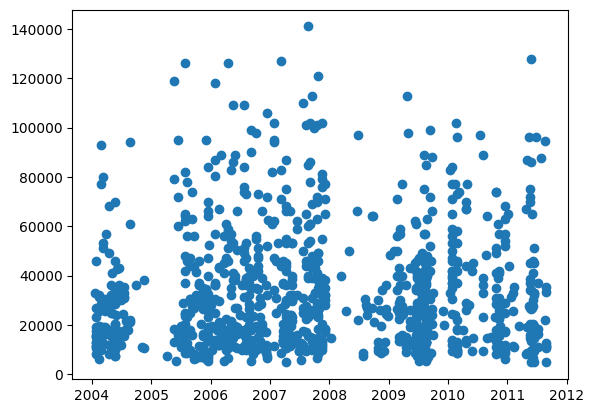

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [11]:
df.shape

(412698, 53)

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [13]:
df_temp = df.copy()

### Add datetime parameters for `saledate` column

In [14]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
df["isMonthEnd"] = df.saledate.dt.is_month_end
df["isMonthStart"] = df.saledate.dt.is_month_start
df["isQuarterEnd"] = df.saledate.dt.is_quarter_end
df["isQuarterStart"] = df.saledate.dt.is_quarter_start
df["isYearEnd"] = df.saledate.dt.is_year_end
df["isYearStart"] = df.saledate.dt.is_year_start

In [15]:
df.shape

(412698, 64)

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
isMonthStart,False,False,False,False,False
isQuarterEnd,False,False,False,False,False
isQuarterStart,False,False,False,False,False
isYearEnd,False,False,False,False,False


In [17]:
df.drop("saledate",axis=1,inplace=True)

## 5. Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [18]:
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

We see that there are many different types of dtypes like objects string etc are present, so we cant train like this!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 63 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [21]:
# This is essentially asking: Is it a Numeric?
pd.api.types.is_numeric_dtype(df["UsageBand"])

False

In [22]:
# Find the columns which contain strings
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 63 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [24]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Save Preprocessed Data
Export current dataframe 
So that later on we can start directly from here!

In [25]:
df.to_csv("data/train_temp_timeDate_cat.csv", index=False)

In [26]:
df = pd.read_csv("data/train_temp_timeDate_cat.csv", low_memory=False)

## Filling Missing Values 
#### FIll Numeric Values

In [27]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
isMonthEnd
isMonthStart
isQuarterEnd
isQuarterStart
isYearEnd
isYearStart


In [28]:
# Check which ones actually have missing values from these numeric type: 

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [29]:
# Fill these data with the median
# BUT also add information for each column that whether the information was missing or not
# Its just to say that originally the data was missing here

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # ADD COLUMN
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill the numeric columns with MEDIAN
            df[label] = content.fillna(content.median())

#### Filling Non-Numeric Data

In [30]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
pd.Categorical(df["state"])

['Alabama', 'North Carolina', 'New York', 'Texas', 'New York', ..., 'Texas', 'Florida', 'Florida', 'Texas', 'Florida']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [32]:
pd.Categorical(df["state"]).codes

# SO each category has a unique code !

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [33]:
pd.Categorical(df["UsageBand"]).codes

# -1 indicates missing, if we dont want that we can do +1

array([ 1,  1,  0, ..., -1, -1, -1], dtype=int8)

SO we need to turn all the categories into some codes(numbers)

In [34]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # ADD THE BINARY COLUMN:
        df[label+"_is_missing"] = pd.isnull(content)
        # Fill in the missing categorical values with codes: 
        df[label] = pd.Categorical(content).codes+1

In [35]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,1139278,1139282,1139283,1139284,1139290,1139291,1139292,1139299,1139301,1139304,1139311,1139333,1139344,1139346,1139348,1139351,1139354,1139356,1139357,1139358,1139363,1139365,1139367,1139369,1139379,1139382,1139390,1139398,1139401,1139409,1139412,1139413,1139415,1139418,1139421,1139423,1139424,1139426,1139429,1139432,1139445,1139449,1139450,1139451,1139455,1139456,1139457,1139459,1139461,1139463,1139464,1139465,1139469,1139473,1139476,1139479,1139480,1139481,1139482,1139484,1139487,1139488,1139489,1139490,1139493,1139496,1139501,1139502,1139508,1139512,1139513,1139514,1139515,1139518,1139519,1139526,1139528,1139531,1139532,1139535,1139536,1139539,1139540,1139541,1139542,1139543,1139545,1139546,1139547,1139550
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,24000.0,22500.0,36000.0,30500.0,28000.0,19000.0,13500.0,9500.0,12500.0,11500.0,41000.0,34500.0,26000.0,73000.0,33000.0,12500.0,15500.0,53000.0,46000.0,89000.0,51000.0,14000.0,31500.0,14000.0,18500.0,10000.0,8250.0,20500.0,9500.0,51000.0,39000.0,58000.0,15500.0,7750.0,32000.0,11500.0,12000.0,75000.0,5500.0,28500.0,35500.0,11500.0,35500.0,30000.0,18500.0,33000.0,9500.0,8500.0,19000.0,37000.0,51000.0,8250.0,23000.0,30500.0,28000.0,12000.0,8100.0,29000.0,102000.0,35000.0,33500.0,53000.0,30000.0,39000.0,15000.0,70000.0,7500.0,13000.0,44000.0,26000.0,67000.0,17000.0,33000.0,12000.0,52000.0,33000.0,50000.0,57000.0,36000.0,10000.0,27000.0,21000.0,25000.0,12500.0,11500.0,25500.0,17500.0,64000.0,20500.0,27000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,1024998,319906,1052214,1068082,1058450,1004810,1026973,1002713,125790,1011914,1014135,999192,1044500,821452,294562,833838,565440,1004127,44800,1018076,871201,973717,1036100,1050658,70214,1068548,1011114,138847,1011478,999090,108090,1045512,1066239,1026462,1048704,999442,1011821,625882,1007166,362075,1066661,115392,1059046,980151,571708,1042584,1063011,1029997,697529,1033597,882909,1015814,1058869,1054162,1065636,1025088,1010707,1062393,450508,762683,1054383,404336,1060419,982928,1008075,1053081,1048655,877241,1052606,318203,1029569,876671,1015565,1018704,1030896,1012428,1026282,616902,1042645,1002296,1029708,1054302,1014876,742947,1003012,1024992,273291,1031217,332277,62171
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,4605,5255,2232,3542,5162,4604,9510,21442,7040,3177,8867,3350,7040,85,3542,7009,7040,25458,19167,1333,1263,9566,9109,1918,13395,112,7110,7043,18604,3362,1088,5853,17188,6270,2797,3217,4818,23937,7002,1078,13776,7014,1830,13776,11982,2140,506,28561,1078,28920,3783,5766,3171,663,3357,22074,9560,13247,1333,3807,13792,1129,5273,1130,18588,3282,9569,3409,7944,4116,14411,7277,4605,17311,1192,8988,4806,1269,28741,3166,3877,4794,4606,3423,1954,4794,7014,4789,1571,13776
datasource,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.

In [36]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,2,2,1,1,3,2,1,1,2,3
fiModelDesc,963,1745,336,3716,4261,500,1472,749,788,1791


## Fitting the model

Split into train and Valid sets: Because we have imported TrainValid set itself

<br>

Train.csv is the training set, which contains data through the end of 2011.<br>
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout

<br>

So we'll seperate them out on the basis of years till 2011 is train set and 2012 is the valid set

In [37]:
train_set = df[df['saleYear'] <= 2011]
valid_set = df[df['saleYear'] == 2012]

len(train_set), len(valid_set)

(401125, 11573)

In [38]:
# Split into X and y: 
X_train, y_train = train_set.drop("SalePrice", axis=1), train_set.SalePrice
X_valid, y_valid = valid_set.drop("SalePrice", axis=1), valid_set.SalePrice

In [39]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

CPU times: user 15min 37s, sys: 5.51 s, total: 15min 42s
Wall time: 2min 16s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [40]:
def rmsle(predicted, actual):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE) between predicted and actual values.
    
    Parameters:
        predicted (array-like): Predicted values.
        actual (array-like): Actual values.
    
    Returns:
        float: RMSLE value.
    """
    predicted = np.log1p(predicted)
    actual = np.log1p(actual)
    squared_errors = (predicted - actual) ** 2
    mean_squared_log_error = np.mean(squared_errors)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [41]:
# %%time
# # Change max samples in RandomForestRegressor
# model = RandomForestRegressor(n_jobs=-1,
#                               max_samples=10000)

# # Cutting down the max number of samples each tree can see improves training time
# model.fit(X_train, y_train)

# show_scores(model) 

# # {'Training MAE': 5554.932337675286,
# #  'Valid MAE': 7156.405706385553,
# #  'Training RMSLE': 0.257042248794724,
# #  'Valid RMSLE': 0.29190177191266664,
# #  'Training R^2': 0.8605979885685595,
# #  'Valid R^2': 0.8326849277782598}

In [42]:
# %%time
# # Create the parameter grid based on the results of random search 
# forest = RandomForestRegressor(n_jobs=-1)

# param_grid = [
# {'n_estimators': [10, 25], 'max_features': [5, 10], 
#  'max_depth': [10, 50, None], "max_samples": [10000]}
# ]
# rs_model = RandomizedSearchCV(RandomForestRegressor(),
#                               param_distributions=param_grid,
#                               n_iter=20,
#                               cv=5,
#                               verbose=True)

# rs_model.fit(X_train, y_train)
# show_scores(rs_model)

# # {'Training MAE': 7003.379992969773,
# #  'Valid MAE': 8697.734164002419,
# #  'Training RMSLE': 0.31262385024577816,
# #  'Valid RMSLE': 0.3566794276527088,
# #  'Training R^2': 0.7918122394387178,
# #  'Valid R^2': 0.7762609505494079}

# # {'n_estimators': 25, 'max_samples': 10000, 'max_features': 10, 'max_depth': 50}

In [43]:
# ideal_model = rs_model.best_estimator_
# ideal_model.fit(X_train, y_train)
# show_scores(ideal_model)

# # {'Training MAE': 7038.273075674665,
# #  'Valid MAE': 8755.299054696277,
# #  'Training RMSLE': 0.3140420370346625,
# #  'Valid RMSLE': 0.35586171103270153,
# #  'Training R^2': 0.7888634791633351,
# #  'Valid R^2': 0.7683975790967323}

In [44]:
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

show_scores(fast_model)

{'Training MAE': 2544.050103308492,
 'Valid MAE': 5938.794979527197,
 'Training RMSLE': 0.1293783807604516,
 'Valid RMSLE': 0.2446856851329596,
 'Training R^2': 0.9670850213994154,
 'Valid R^2': 0.88108323134798}

## Make predictions on the Test Data

In [45]:
df_test = pd.read_csv("data/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [46]:
# fast_model.predict(df_test)

The test data isn't in the same format of our other data, so we have to fix it. Let's create a function to preprocess our data.

### Preprocessing Data

In [47]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [48]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df["isMonthEnd"] = df.saledate.dt.is_month_end
    df["isMonthStart"] = df.saledate.dt.is_month_start
    df["isQuarterEnd"] = df.saledate.dt.is_quarter_end
    df["isQuarterStart"] = df.saledate.dt.is_quarter_start
    df["isYearEnd"] = df.saledate.dt.is_year_end
    df["isYearStart"] = df.saledate.dt.is_year_start
    
    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Find the columns which contain strings and convert them to categories
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # ADD COLUMN
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill the numeric columns with MEDIAN
                df[label] = content.fillna(content.median())
                
        for label, content in df.items():
            if not pd.api.types.is_numeric_dtype(content):
                # ADD THE BINARY COLUMN:
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill in the missing categorical values with codes: 
                df[label] = pd.Categorical(content).codes+1       
    
    return df

In [49]:
df_test = preprocess_data(df_test)

/tmp/ipykernel_4797/2851099686.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)


In [50]:
df_test.shape

(12457, 107)

In [51]:
df.shape

(412698, 109)

In [52]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any auctioneerID fields.

To fix it, we'll add a column to the test dataset called auctioneerID_is_missing and fill it with False, since none of the auctioneerID fields are missing in the test dataset.

In [53]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

/tmp/ipykernel_4797/2403804117.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test["auctioneerID_is_missing"] = False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,isMonthEnd,isMonthStart,isQuarterEnd,isQuarterStart,isYearEnd,isYearStart,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,Tru

In [54]:
df_test.shape

(12457, 108)

In [55]:
X_train.shape

(401125, 108)

In [56]:
df_test = df_test.reindex(columns=X_train.columns)

In [57]:
# Make predictions on the test dataset using the best model
test_preds = fast_model.predict(df_test)

X_TRAIN AND TEST SETS WERE NOT COMPLETELY MATCHING: SO HAD TO DO THESE STEPS TO FIGURE OUT THE PROBLEM:


In [58]:
# differing_columns = []
# for column_name in X_train.columns:
#     if column_name not in df_test.columns:
#         differing_columns.append(column_name)

# # Print the differing columns
# print("Differing columns:")
# for column in differing_columns:
#     print(column)
    
# if X_train.equals(df_test):
#     print("Dataframes are equal")
# else:
#     print("Dataframes are not equal")
    
# if set(X_train.columns) != set(df_test.columns):
#     print("Column names are not matching.")
# else:
#     print("Column names are matching.")

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [59]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16829.652778
1,1227844,19015.205853
2,1227847,46568.650794
3,1227848,65301.706349
4,1227863,54621.999008
5,1227870,28102.993777
6,1227871,24254.472403
7,1227879,12120.595328
8,1227880,14821.522817
9,1227881,35840.276876


In [60]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Test MAE:", mae)
print("Test RMSLE:", rmsle)
print("Test R^2:", r2)

In [61]:
# Find feature importance of our best model
fast_model.feature_importances_

array([3.52196014e-02, 2.23020306e-02, 4.26361975e-02, 1.88700256e-03,
       3.74335745e-03, 2.06312147e-01, 3.34480389e-03, 1.06838369e-03,
       5.56430940e-02, 3.49785391e-02, 6.53431181e-02, 4.33495342e-03,
       1.38316985e-02, 1.64837903e-01, 3.86513604e-02, 7.15292226e-03,
       1.83143297e-03, 1.59498646e-03, 3.28460049e-03, 5.25681569e-02,
       2.72960681e-04, 7.06961812e-05, 1.37760834e-03, 2.24795991e-04,
       8.96930210e-04, 2.88560329e-05, 4.02217850e-03, 8.57090272e-03,
       4.55597249e-03, 4.47088547e-04, 2.83513358e-03, 1.24381144e-03,
       3.75361521e-03, 1.68382929e-03, 5.00260869e-04, 1.02802406e-02,
       8.14100091e-04, 1.09418050e-02, 5.58908056e-05, 2.71049942e-03,
       1.04597620e-03, 9.43546775e-04, 2.06341125e-03, 5.81819679e-04,
       9.63135309e-04, 3.81873501e-04, 2.70640192e-04, 2.40807927e-03,
       1.28303293e-03, 2.41906566e-04, 7.12376905e-04, 7.27821150e-02,
       4.91282860e-03, 7.16783817e-03, 3.66352464e-03, 1.12374619e-02,
      

In [62]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

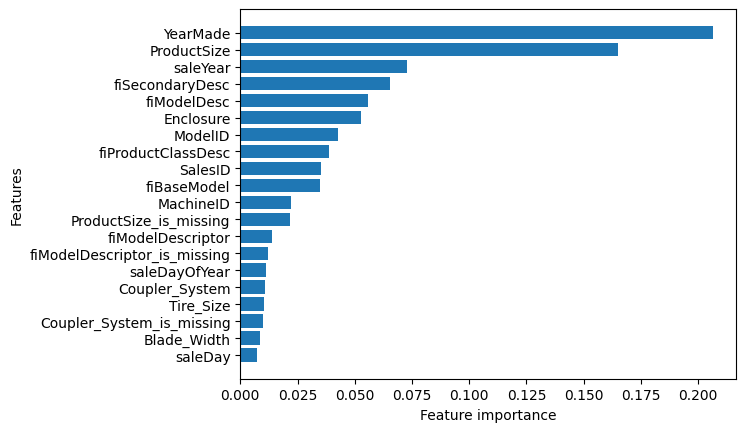

In [63]:
plot_features(X_train.columns, fast_model.feature_importances_)

In [64]:
from catboost import CatBoostRegressor, cv, Pool

In [65]:
cb_model = CatBoostRegressor(random_seed=13, verbose=200)

In [66]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.10556
0:	learn: 21822.6803836	total: 85.6ms	remaining: 1m 25s
200:	learn: 8891.8866311	total: 7.36s	remaining: 29.2s
400:	learn: 8063.6766133	total: 14.5s	remaining: 21.7s
600:	learn: 7711.1895088	total: 21.4s	remaining: 14.2s
800:	learn: 7469.6656342	total: 28.6s	remaining: 7.1s
999:	learn: 7288.4564159	total: 35.5s	remaining: 0us


In [67]:
cb_preds = cb_model.predict(X_valid)

In [68]:
show_scores(cb_model)

# {'Training MAE': 4814.310697076826,
#  'Valid MAE': 6127.449972548095,
#  'Training RMSLE': 0.24108061433520955,
#  'Valid RMSLE': 0.2595286949506391,
#  'Training R^2': 0.899902279583848,
#  'Valid R^2': 0.8793279776721997}

/tmp/ipykernel_4797/1773916387.py:13: RuntimeWarning: invalid value encountered in log1p
  actual = np.log1p(actual)


{'Training MAE': 4814.310697076826,
 'Valid MAE': 6127.449972548095,
 'Training RMSLE': 0.24108061433520955,
 'Valid RMSLE': 0.2595286949506391,
 'Training R^2': 0.899902279583848,
 'Valid R^2': 0.8793279776721997}

In [69]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [70]:
%%time
grid = GridSearchCV(estimator=cb_model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 21602.0982617	total: 122ms	remaining: 12.1s
99:	learn: 8418.7349437	total: 12.5s	remaining: 0us
CPU times: user 1min 30s, sys: 3.05 s, total: 1min 33s
Wall time: 5min 26s


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f7d606648b0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [71]:
show_scores(grid)

# {'Training MAE': 5581.70074757738,
#  'Valid MAE': 6949.867292407332,
#  'Training RMSLE': 0.26384293812676785,
#  'Valid RMSLE': 0.29372590376788904,
#  'Training R^2': 0.8664491250312623,
#  'Valid R^2': 0.846824241625184}

{'Training MAE': 5581.70074757738,
 'Valid MAE': 6949.867292407332,
 'Training RMSLE': 0.26384293812676785,
 'Valid RMSLE': 0.29372590376788904,
 'Training R^2': 0.8664491250312623,
 'Valid R^2': 0.846824241625184}

0:	learn: 21575.6920477	total: 312ms	remaining: 9.04s
29:	learn: 12049.4684739	total: 8.19s	remaining: 0us
0:	learn: 23138.2374106	total: 300ms	remaining: 29.7s
99:	learn: 16320.4519116	total: 24.7s	remaining: 0us
0:	learn: 21300.0194060	total: 121ms	remaining: 3.51s
29:	learn: 11192.3011632	total: 7.36s	remaining: 0us
0:	learn: 23121.9535439	total: 211ms	remaining: 20.9s
99:	learn: 15175.1422802	total: 27.4s	remaining: 0us
0:	learn: 22496.8235423	total: 235ms	remaining: 6.81s
29:	learn: 12454.1775667	total: 9.15s	remaining: 0us
0:	learn: 21744.8193795	total: 465ms	remaining: 22.8s
49:	learn: 8836.9035627	total: 27.6s	remaining: 0us
0:	learn: 22088.5387816	total: 378ms	remaining: 11s
29:	learn: 14104.7228339	total: 6.45s	remaining: 0us
0:	learn: 22509.7342308	total: 118ms	remaining: 11.7s
99:	learn: 15723.5503875	total: 26.3s	remaining: 0us
0:	learn: 21950.8352122	total: 163ms	remaining: 4.74s
29:	learn: 13255.2277144	total: 7.62s	remaining: 0us
0:	learn: 21879.5705314	total: 259ms	rem

In [73]:
# from scipy.stats import uniform

# param_grid = {
#     'iterations': [100, 200, 300],  # Number of boosting iterations
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8],  # Depth of the trees
#     'l2_leaf_reg': uniform(0, 10)  # L2 regularization coefficient
# }

In [75]:
# random_search = RandomizedSearchCV(
#     cb_model, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 22917.1311935	total: 31.3ms	remaining: 3.1s
99:	learn: 15626.8386078	total: 3.46s	remaining: 0us
0:	learn: 22109.4777587	total: 35.3ms	remaining: 3.5s
99:	learn: 14781.8396585	total: 3.52s	remaining: 0us
0:	learn: 23850.9353568	total: 34.2ms	remaining: 3.38s
99:	learn: 15936.2086015	total: 3.63s	remaining: 0us
0:	learn: 22600.0172052	total: 35.6ms	remaining: 3.52s
99:	learn: 15341.0438574	total: 3.71s	remaining: 0us
0:	learn: 22876.8032747	total: 35.8ms	remaining: 3.55s
99:	learn: 15353.9939377	total: 3.85s	remaining: 0us
0:	learn: 22199.1399404	total: 26.2ms	remaining: 7.83s
200:	learn: 10065.8794112	total: 4.11s	remaining: 2.02s
299:	learn: 9510.4694012	total: 6.23s	remaining: 0us
0:	learn: 21291.4893282	total: 25.4ms	remaining: 7.58s
200:	learn: 9715.3124658	total: 4.41s	remaining: 2.17s
299:	learn: 9184.2634445	total: 6.5s	remaining: 0us
0:	learn: 22937.4985174	total: 21.8ms	remaining: 6.52s
200:	learn: 10176.24

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f7d606648b0>,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7d8cd785e0>,
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [76]:
# show_scores(random_search)

# # {'Training MAE': 5118.822051127646,
# #  'Valid MAE': 6512.669779423266,
# #  'Training RMSLE': 0.25035101185567815,
# #  'Valid RMSLE': 0.27775222482407247,
# #  'Training R^2': -60160441.58633246,
# #  'Valid R^2': -93006804.7969426}

{'Training MAE': 5118.822051127646,
 'Valid MAE': 6512.669779423266,
 'Training RMSLE': 0.25035101185567815,
 'Valid RMSLE': 0.27775222482407247,
 'Training R^2': -60160441.58633246,
 'Valid R^2': -93006804.7969426}

In [85]:
model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
show_scores(grid.best_estimator_)

0:	learn: 22651.1033767	total: 194ms	remaining: 5.62s
1:	learn: 22075.1902203	total: 266ms	remaining: 3.73s
2:	learn: 21546.6956148	total: 345ms	remaining: 3.11s
3:	learn: 21049.3905452	total: 614ms	remaining: 3.99s
4:	learn: 20601.9946108	total: 1.23s	remaining: 6.16s
5:	learn: 20186.2286166	total: 1.3s	remaining: 5.22s
6:	learn: 19782.4269852	total: 1.52s	remaining: 4.99s
7:	learn: 19408.8898505	total: 1.91s	remaining: 5.26s
8:	learn: 19064.2998967	total: 2.22s	remaining: 5.17s
9:	learn: 18754.3400027	total: 2.61s	remaining: 5.23s
10:	learn: 18440.9301837	total: 3.16s	remaining: 5.45s
11:	learn: 18127.0154228	total: 3.43s	remaining: 5.15s
12:	learn: 17840.4450476	total: 3.69s	remaining: 4.82s
13:	learn: 17575.2529789	total: 3.75s	remaining: 4.29s
14:	learn: 17339.7710995	total: 4.1s	remaining: 4.1s
15:	learn: 17103.8735501	total: 4.23s	remaining: 3.7s
16:	learn: 16891.5356437	total: 4.35s	remaining: 3.33s
17:	learn: 16666.8998612	total: 4.42s	remaining: 2.95s
18:	learn: 16447.4322573

0:	learn: 22054.9254585	total: 346ms	remaining: 10s
1:	learn: 21000.5788527	total: 543ms	remaining: 7.6s
2:	learn: 20094.9157641	total: 827ms	remaining: 7.44s
3:	learn: 19330.2630402	total: 1.15s	remaining: 7.48s
4:	learn: 18637.4617206	total: 1.44s	remaining: 7.21s
5:	learn: 18005.5057602	total: 1.62s	remaining: 6.5s
6:	learn: 17507.9695050	total: 1.93s	remaining: 6.35s
7:	learn: 17007.8982756	total: 2.01s	remaining: 5.53s
8:	learn: 16562.4084649	total: 2.13s	remaining: 4.98s
9:	learn: 16150.2863967	total: 2.47s	remaining: 4.94s
10:	learn: 15831.2934957	total: 2.76s	remaining: 4.76s
11:	learn: 15540.2626922	total: 3.22s	remaining: 4.83s
12:	learn: 15162.1220111	total: 3.87s	remaining: 5.07s
13:	learn: 14869.1498946	total: 4.11s	remaining: 4.7s
14:	learn: 14648.6158069	total: 4.38s	remaining: 4.38s
15:	learn: 14370.6818874	total: 4.61s	remaining: 4.03s
16:	learn: 14094.1045372	total: 4.79s	remaining: 3.66s
17:	learn: 13867.6363951	total: 4.85s	remaining: 3.23s
18:	learn: 13667.0579473	

0:	learn: 23139.3874626	total: 326ms	remaining: 9.45s
1:	learn: 23016.3451126	total: 574ms	remaining: 8.04s
2:	learn: 22896.7000399	total: 915ms	remaining: 8.23s
3:	learn: 22777.0601706	total: 1.06s	remaining: 6.92s
4:	learn: 22659.1410598	total: 1.17s	remaining: 5.85s
5:	learn: 22547.1030295	total: 1.33s	remaining: 5.32s
6:	learn: 22432.4785767	total: 1.48s	remaining: 4.86s
7:	learn: 22319.4865885	total: 1.76s	remaining: 4.84s
8:	learn: 22208.0926641	total: 1.93s	remaining: 4.5s
9:	learn: 22100.2144323	total: 2.23s	remaining: 4.45s
10:	learn: 21991.6631546	total: 2.48s	remaining: 4.29s
11:	learn: 21885.3081032	total: 2.81s	remaining: 4.22s
12:	learn: 21781.0051205	total: 3.02s	remaining: 3.96s
13:	learn: 21677.1834899	total: 3.21s	remaining: 3.67s
14:	learn: 21575.9086167	total: 3.59s	remaining: 3.59s
15:	learn: 21477.8792084	total: 3.71s	remaining: 3.25s
16:	learn: 21380.0889063	total: 3.92s	remaining: 3s
17:	learn: 21283.2437390	total: 4.43s	remaining: 2.95s
18:	learn: 21187.1355782

0:	learn: 22060.3499086	total: 620ms	remaining: 18s
1:	learn: 21498.7978707	total: 793ms	remaining: 11.1s
2:	learn: 21013.0515205	total: 965ms	remaining: 8.68s
3:	learn: 20557.7481870	total: 1.16s	remaining: 7.56s
4:	learn: 20085.8277343	total: 1.45s	remaining: 7.25s
5:	learn: 19679.1698735	total: 1.54s	remaining: 6.17s
6:	learn: 19273.0730164	total: 1.67s	remaining: 5.48s
7:	learn: 18897.1937085	total: 1.85s	remaining: 5.08s
8:	learn: 18540.5415652	total: 2.03s	remaining: 4.74s
9:	learn: 18202.6385977	total: 2.24s	remaining: 4.48s
10:	learn: 17862.1568685	total: 2.41s	remaining: 4.16s
11:	learn: 17571.9634558	total: 2.76s	remaining: 4.14s
12:	learn: 17300.2621215	total: 2.9s	remaining: 3.79s
13:	learn: 16995.2496059	total: 3.27s	remaining: 3.74s
14:	learn: 16720.5694651	total: 3.62s	remaining: 3.62s
15:	learn: 16467.6779233	total: 3.89s	remaining: 3.4s
16:	learn: 16238.6203180	total: 4.11s	remaining: 3.14s
17:	learn: 16015.1754719	total: 4.25s	remaining: 2.83s
18:	learn: 15804.8991197

70:	learn: 10477.9165282	total: 7.72s	remaining: 3.15s
71:	learn: 10453.2010739	total: 8s	remaining: 3.11s
72:	learn: 10426.4224324	total: 8.14s	remaining: 3.01s
73:	learn: 10394.3107944	total: 8.29s	remaining: 2.91s
74:	learn: 10370.1841014	total: 8.41s	remaining: 2.8s
75:	learn: 10344.3287493	total: 8.54s	remaining: 2.7s
76:	learn: 10323.0327761	total: 8.66s	remaining: 2.59s
77:	learn: 10312.2721060	total: 8.78s	remaining: 2.48s
78:	learn: 10291.0182878	total: 8.89s	remaining: 2.36s
79:	learn: 10268.9052077	total: 9.01s	remaining: 2.25s
80:	learn: 10249.8032666	total: 9.28s	remaining: 2.17s
81:	learn: 10227.6603368	total: 9.45s	remaining: 2.07s
82:	learn: 10211.6670090	total: 9.6s	remaining: 1.97s
83:	learn: 10191.3656042	total: 9.91s	remaining: 1.89s
84:	learn: 10173.1387916	total: 9.98s	remaining: 1.76s
85:	learn: 10153.8635232	total: 10.1s	remaining: 1.64s
86:	learn: 10136.2177978	total: 10.2s	remaining: 1.53s
87:	learn: 10108.2110747	total: 10.4s	remaining: 1.42s
88:	learn: 10090

0:	learn: 22564.8161815	total: 225ms	remaining: 6.53s
1:	learn: 21919.9626655	total: 299ms	remaining: 4.19s
2:	learn: 21318.8406498	total: 472ms	remaining: 4.25s
3:	learn: 20751.0943150	total: 653ms	remaining: 4.24s
4:	learn: 20210.9764082	total: 955ms	remaining: 4.78s
5:	learn: 19721.5964659	total: 1.34s	remaining: 5.35s
6:	learn: 19241.8922896	total: 1.52s	remaining: 5.01s
7:	learn: 18810.9996721	total: 1.76s	remaining: 4.83s
8:	learn: 18395.0439956	total: 1.88s	remaining: 4.39s
9:	learn: 17999.8960707	total: 2s	remaining: 4s
10:	learn: 17643.0383486	total: 2.22s	remaining: 3.84s
11:	learn: 17312.9067287	total: 2.48s	remaining: 3.72s
12:	learn: 16980.7253707	total: 2.74s	remaining: 3.59s
13:	learn: 16662.6196444	total: 2.92s	remaining: 3.34s
14:	learn: 16380.1964852	total: 3.2s	remaining: 3.2s
15:	learn: 16096.8245749	total: 3.46s	remaining: 3.03s
16:	learn: 15832.3362359	total: 3.75s	remaining: 2.86s
17:	learn: 15587.0133376	total: 3.89s	remaining: 2.59s
18:	learn: 15355.7410639	tot

40:	learn: 18790.9201265	total: 9.26s	remaining: 2.03s
41:	learn: 18709.1040229	total: 9.43s	remaining: 1.8s
42:	learn: 18628.9338702	total: 9.67s	remaining: 1.57s
43:	learn: 18546.8960905	total: 9.85s	remaining: 1.34s
44:	learn: 18468.9665862	total: 10.3s	remaining: 1.15s
45:	learn: 18391.6891354	total: 10.6s	remaining: 920ms
46:	learn: 18312.1627226	total: 10.8s	remaining: 692ms
47:	learn: 18234.4207796	total: 11.1s	remaining: 461ms
48:	learn: 18158.1530112	total: 11.6s	remaining: 237ms
49:	learn: 18082.3743540	total: 12s	remaining: 0us
0:	learn: 21300.2689242	total: 455ms	remaining: 45s
1:	learn: 20150.2283250	total: 825ms	remaining: 40.4s
2:	learn: 19094.5270976	total: 1.26s	remaining: 40.7s
3:	learn: 18168.4489425	total: 1.55s	remaining: 37.1s
4:	learn: 17405.3159046	total: 2.02s	remaining: 38.4s
5:	learn: 16718.0248222	total: 2.37s	remaining: 37.1s
6:	learn: 16112.8481619	total: 2.73s	remaining: 36.3s
7:	learn: 15615.3121838	total: 2.92s	remaining: 33.6s
8:	learn: 15165.6447694	t

40:	learn: 12313.4724148	total: 10.1s	remaining: 2.21s
41:	learn: 12236.9054013	total: 10.4s	remaining: 1.98s
42:	learn: 12159.7967107	total: 10.6s	remaining: 1.72s
43:	learn: 12099.0546737	total: 10.7s	remaining: 1.45s
44:	learn: 12022.7003225	total: 10.9s	remaining: 1.21s
45:	learn: 11965.0421280	total: 11.1s	remaining: 961ms
46:	learn: 11905.3591111	total: 11.2s	remaining: 712ms
47:	learn: 11851.4783490	total: 11.3s	remaining: 469ms
48:	learn: 11795.7733822	total: 11.4s	remaining: 232ms
49:	learn: 11742.6414759	total: 11.4s	remaining: 0us
0:	learn: 22564.8161815	total: 257ms	remaining: 25.5s
1:	learn: 21919.9626655	total: 807ms	remaining: 39.6s
2:	learn: 21318.8406498	total: 1.26s	remaining: 40.8s
3:	learn: 20751.0943150	total: 1.72s	remaining: 41.4s
4:	learn: 20210.9764082	total: 2.01s	remaining: 38.2s
5:	learn: 19721.5964659	total: 2.36s	remaining: 37s
6:	learn: 19241.8922896	total: 2.53s	remaining: 33.6s
7:	learn: 18810.9996721	total: 2.65s	remaining: 30.5s
8:	learn: 18395.043995

70:	learn: 10894.6991735	total: 17.6s	remaining: 7.19s
71:	learn: 10869.3234556	total: 17.8s	remaining: 6.93s
72:	learn: 10841.0463663	total: 18.2s	remaining: 6.73s
73:	learn: 10807.9733497	total: 18.4s	remaining: 6.46s
74:	learn: 10777.8595178	total: 18.7s	remaining: 6.24s
75:	learn: 10752.7798626	total: 18.9s	remaining: 5.97s
76:	learn: 10723.5491997	total: 19.2s	remaining: 5.72s
77:	learn: 10696.0371416	total: 19.5s	remaining: 5.5s
78:	learn: 10668.7709549	total: 19.6s	remaining: 5.22s
79:	learn: 10648.0016554	total: 19.9s	remaining: 4.97s
80:	learn: 10629.6252569	total: 20.3s	remaining: 4.76s
81:	learn: 10604.2025937	total: 20.8s	remaining: 4.55s
82:	learn: 10578.7396804	total: 21.2s	remaining: 4.34s
83:	learn: 10561.9105004	total: 21.6s	remaining: 4.12s
84:	learn: 10541.7165644	total: 22.1s	remaining: 3.9s
85:	learn: 10514.6342451	total: 22.3s	remaining: 3.63s
86:	learn: 10492.0427511	total: 22.4s	remaining: 3.35s
87:	learn: 10468.0568061	total: 22.5s	remaining: 3.07s
88:	learn: 1

2:	learn: 19256.7577775	total: 388ms	remaining: 12.6s
3:	learn: 18296.1758366	total: 517ms	remaining: 12.4s
4:	learn: 17431.6552900	total: 643ms	remaining: 12.2s
5:	learn: 16666.0834645	total: 767ms	remaining: 12s
6:	learn: 15975.6383755	total: 895ms	remaining: 11.9s
7:	learn: 15353.2310082	total: 1.02s	remaining: 11.7s
8:	learn: 14815.0175782	total: 1.15s	remaining: 11.6s
9:	learn: 14379.7625939	total: 1.25s	remaining: 11.3s
10:	learn: 13988.8875134	total: 1.37s	remaining: 11.1s
11:	learn: 13638.0054574	total: 1.48s	remaining: 10.9s
12:	learn: 13288.0773473	total: 1.61s	remaining: 10.8s
13:	learn: 13000.5857967	total: 1.74s	remaining: 10.7s
14:	learn: 12739.8090468	total: 1.87s	remaining: 10.6s
15:	learn: 12513.2083345	total: 2s	remaining: 10.5s
16:	learn: 12308.1538442	total: 2.13s	remaining: 10.4s
17:	learn: 12090.8230180	total: 2.26s	remaining: 10.3s
18:	learn: 11900.0349296	total: 2.4s	remaining: 10.2s
19:	learn: 11756.0010058	total: 2.53s	remaining: 10.1s
20:	learn: 11592.9259401

{'Training MAE': 5562.8215064765045,
 'Valid MAE': 6955.103875219224,
 'Training RMSLE': 0.2631249298728535,
 'Valid RMSLE': 0.29197415213707095,
 'Training R^2': 0.8668800204954553,
 'Valid R^2': 0.8455355415452198}

In [89]:
from xgboost import XGBRegressor

xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=3, max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, n_estimators=100, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear', ...)

In [91]:
xbgr = xgbr.fit(X_train, y_train)

In [92]:
show_scores(xbgr)

/tmp/ipykernel_4797/1773916387.py:13: RuntimeWarning: invalid value encountered in log1p
  actual = np.log1p(actual)


{'Training MAE': 4944.523848838956,
 'Valid MAE': 6486.55925646401,
 'Training RMSLE': 0.2480377760557865,
 'Valid RMSLE': 0.28227651732092846,
 'Training R^2': 0.8968387595235685,
 'Valid R^2': 0.8664763225259078}